In [1]:
#!pip install pandas
#%matplotlib inline
import math
import numpy as np
import pandas as pd
import pandasql as ps
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import IPython.display as ipd
from tqdm.notebook import tqdm, trange
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

import ast

import utils

from collections import defaultdict
from scipy.stats.stats import pearsonr

plt.rcParams['axes.formatter.useoffset']=False
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [20, 10]

In [13]:
df = pd.read_csv('flat_df_no_nulli.csv', index_col=0)

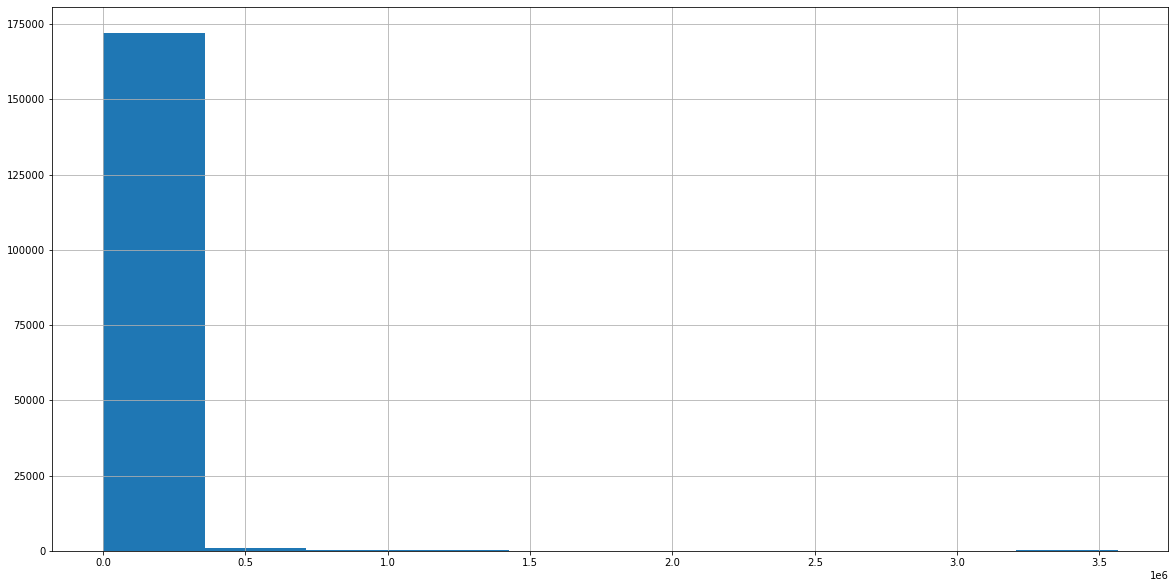

In [9]:
df['ALBUM_listens'].hist()

In [10]:
df['ALBUM_listens'] = df['ALBUM_listens'].apply(lambda x: np.log(x))

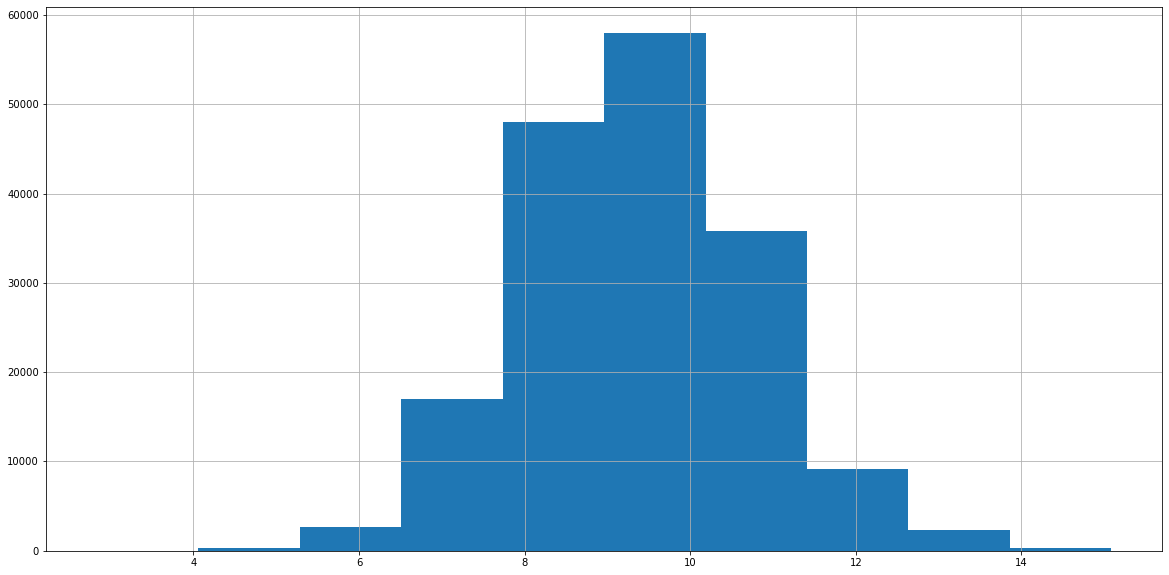

In [11]:
df['ALBUM_listens'].hist()

In [14]:
tutti = list(df.columns)

tutti

['ALBUM_date_released_year',
 'ALBUM_favorites',
 'ALBUM_type',
 'ALBUM_tags',
 'ALBUM_tracks',
 'ALBUM_listens',
 'ALBUM_title',
 'SET_subset',
 'ARTIST_favorites',
 'ARTIST_location',
 'ARTIST_tags',
 'ARTIST_name',
 'TRACK_duration',
 'TRACK_favorites',
 'TRACK_genre_top',
 'TRACK_genres_all',
 'TRACK_genres',
 'TRACK_interest',
 'TRACK_listens',
 'TRACK_tags',
 'TRACK_title',
 'TRACK_bitrate',
 'TRACK_number',
 'rmsekurtosis01',
 'rmsemax01',
 'rmsemean01',
 'rmsemedian01',
 'rmsemin01',
 'rmseskew01',
 'rmsestd01',
 'spectral_bandwidthkurtosis01',
 'spectral_bandwidthmax01',
 'spectral_bandwidthmean01',
 'spectral_bandwidthmedian01',
 'spectral_bandwidthmin01',
 'spectral_bandwidthskew01',
 'spectral_bandwidthstd01',
 'spectral_centroidkurtosis01',
 'spectral_centroidmax01',
 'spectral_centroidmean01',
 'spectral_centroidmedian01',
 'spectral_centroidmin01',
 'spectral_centroidskew01',
 'spectral_centroidstd01',
 'spectral_rolloffkurtosis01',
 'spectral_rolloffmax01',
 'spectral_r

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoders = dict()
column2encode = ['ALBUM_type_']

for col in column2encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [19]:
class_name = 'TRACK_genre_top'
attributes = [
              'TRACK_duration',
             'ALBUM_type_',
              'TRACK_favorites',
              'TRACK_interest',
              'TRACK_listens',
              'TRACK_bitrate',
                'TRACK_number',
             'ARTIST_favorites_',
             'ALBUM_tracks_',
             'ALBUM_listens_',
             'ALBUM_favorites_',
             'ALBUM_date_released_year_',
'chroma_censkurtosis',
 'chroma_censmax',
 'chroma_censmean',
 'chroma_censmedian',
 'chroma_censmin',
 'chroma_censskew',
 'chroma_censstd',
 'chroma_censcqtkurtosis',
 'chroma_cqtmax',
 'chroma_cqtmean',
 'chroma_cqtmedian',
 'chroma_cqtmin',
 'chroma_cqtskew',
 'chroma_cqtstd',
 'chroma_stftkurtosis',
 'chroma_stftmax',
 'chroma_stftmean',
 'chroma_stftmedian',
 'chroma_stftmin',
 'chroma_stftskew',
 'chroma_stftstd',
 'mfcckurtosis',
 'mfccmax',
 'mfccmean',
 'mfccmedian',
 'mfccmin',
 'mfccskew',
 'mfccstd',
 'spectral_contrastkurtosis',
 'spectral_contrastmax',
 'spectral_contrastmean',
 'spectral_contrastmedian',
 'spectral_contrastmin',
 'spectral_contrastskew',
 'spectral_contraststd',
 'tonnetzkurtosis',
 'tonnetzmax',
 'tonnetzmean',
 'tonnetzmedian',
 'tonnetzmin',
 'tonnetzskew',
 'tonnetzstd',
'rmsemax01',
 'rmsemean01',
 'rmsemedian01',
 'rmsemin01',
 'rmseskew01',
 'rmsestd01',
 'spectral_bandwidthkurtosis01',
 'spectral_bandwidthmax01',
 'spectral_bandwidthmean01',
 'spectral_bandwidthmedian01',
 'spectral_bandwidthmin01',
 'spectral_bandwidthskew01',
 'spectral_bandwidthstd01',
 'spectral_centroidkurtosis01',
 'spectral_centroidmax01',
 'spectral_centroidmean01',
 'spectral_centroidmedian01',
 'spectral_centroidmin01',
 'spectral_centroidskew01',
 'spectral_centroidstd01',
 'spectral_rolloffkurtosis01',
 'spectral_rolloffmax01',
 'spectral_rolloffmean01',
 'spectral_rolloffmedian01',
 'spectral_rolloffmin01',
 'spectral_rolloffskew01',
 'spectral_rolloffstd01',
 'zcrkurtosis01',
 'zcrmax01',
 'zcrmean01',
 'zcrmedian01',
 'zcrmin01',
 'zcrskew01',
 'zcrstd01',]

df2 = df[df.TRACK_genre_top.isna() == False]

X = df2[attributes].values
y = df2[class_name]




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [6]:
clf = DecisionTreeClassifier(min_samples_leaf=30, random_state=42)
clf.fit(X_train, y_train)

y_pred0 = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred0))
print('F1-score %s' % f1_score(y_test, y_pred0, average=None))
print(classification_report(y_test, y_pred0))

Accuracy 0.5361563958601095
F1-score [0.         0.69012179 0.         0.         0.53700919 0.55840619
 0.30372493 0.40058766 0.36983471 0.25942685 0.04060914 0.7816092
 0.09090909 0.67130089 0.         0.0989011 ]
                     precision    recall  f1-score   support

              Blues       0.00      0.00      0.00        31
          Classical       0.68      0.70      0.69       364
            Country       0.00      0.00      0.00        58
     Easy Listening       0.00      0.00      0.00         7
         Electronic       0.50      0.58      0.54      2778
       Experimental       0.51      0.62      0.56      3163
               Folk       0.38      0.25      0.30       832
            Hip-Hop       0.42      0.39      0.40      1061
       Instrumental       0.52      0.29      0.37       621
      International       0.34      0.21      0.26       410
               Jazz       0.14      0.02      0.04       169
Old-Time / Historic       0.75      0.82      0.78 

C:\Users\cri98\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

param_grid = {'max_depth': [20], # + [10, 20, 30, 40, 50],
              'min_samples_split': [2], #, 2, 5, 10, 20, 30, 40, 50],
              'min_samples_leaf': [9] #range(10, 50, 10),
             }

scores = ['accuracy', 'f1']

#combinations = list(ParameterGrid(param_grid)) #all combinations

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, n_jobs=-1, verbose=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

report(grid_search.cv_results_, n_top=3)

#clf.cv_results_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.9s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.9s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished


Model with rank: 1
Mean validation score: 0.519 (std: 0.005)
Parameters: {'max_depth': 20, 'min_samples_leaf': 9, 'min_samples_split': 2}



In [28]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [43]:
param_list = {'max_depth': [None] + list(np.arange(2, 40, 2)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

clf = DecisionTreeClassifier()

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=10, n_jobs=-1, verbose=10)
random_search.fit(X, y)
report(random_search.cv_results_, n_top=3)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   51.2s remaining:   11.2s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  1.1min remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Model with rank: 1
Mean validation score: 0.493 (std: 0.026)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 100, 'max_depth': 19}

Model with rank: 2
Mean validation score: 0.493 (std: 0.030)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 50, 'max_depth': 19}

Model with rank: 3
Mean validation score: 0.492 (std: 0.029)
Parameters: {'min_samples_split': 100, 'min_samples_leaf': 50, 'max_depth': 12}



In [9]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=attributes) 
graph = graphviz.Source(dot_data) 


graph.render() 

'Source.gv.pdf'

In [28]:
def trasformaLista(stringa):
    result = list()
    tmp = stringa[1 : len(stringa)-1]
    
    splitted = tmp.split(", ")
    
    for s in splitted:
        result.append(s)
    
    return result


tmp = list();

for index in tqdm(df.index):
    #print(df[df.index == index].TRACK_genres.iloc[0])
    daTrasformare = df[df.index == index].TRACK_genres_soloTop.iloc[0]
    try:
        tmp.append(trasformaLista(daTrasformare))
    except:
        tmp.append(np.NaN)
    
df["TRACK_genres_soloTop"] = tmp

In [60]:
d = dict();
for i in tqdm(range(28, 32, 1)):
    clf = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)
    clf.fit(X_train, y_train)

    y_pred0 = clf.predict(X_test)

    d[i] = accuracy_score(y_test, y_pred0)

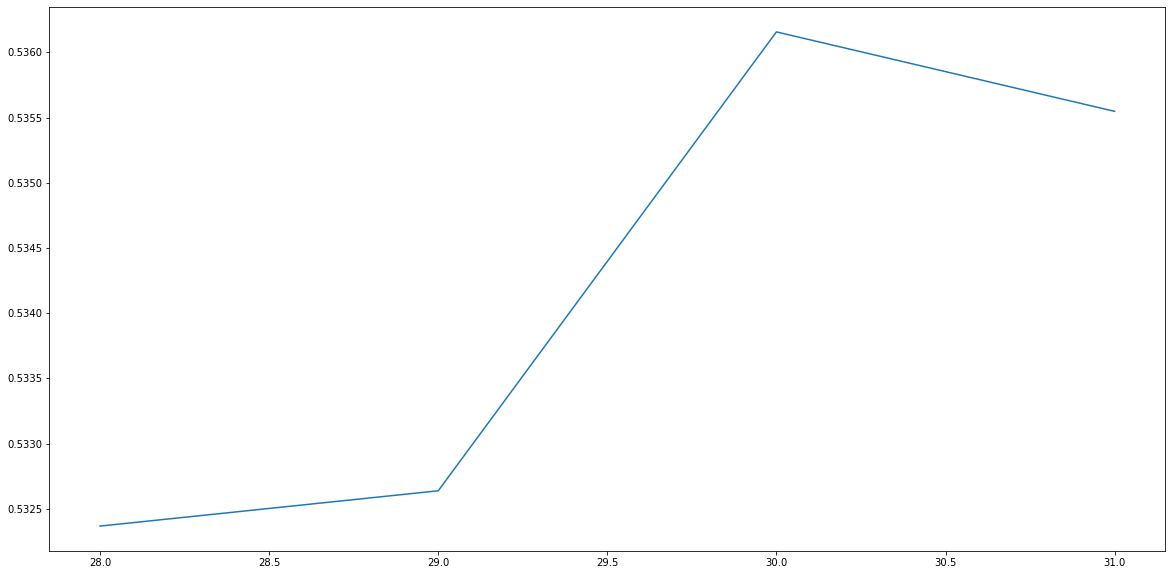

In [61]:
lists = sorted(d.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()